<a href="https://colab.research.google.com/github/harsh-manjhi/data-science-with-python-internship/blob/main/DATA_SCIENCE_WITH_PYTHON_HARSH_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)


In [6]:
import numpy as np, pandas as pd

np.random.seed(0)
df = pd.DataFrame({
    'Sales': np.random.uniform(100, 1000, 200),
    'Profit': np.random.uniform(-200, 300, 200),
    'Region': np.random.choice(['East','West','North','South'], 200),
    'Category': np.random.choice(['Furniture','Office Supplies','Technology'], 200)
})
df.head()


,Sales,Profit,Region,Category
0,593.932154,-44.102059,West,Technology
1,743.670430,148.171744,East,Furniture
2,642.487038,-11.124080,West,Furniture
3,590.394865,-110.198161,East,Technology
4,481.289319,-187.660636,North,Furniture


In [7]:
print("Shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Drop duplicates
df = df.drop_duplicates()

# Fill missing numeric columns with median
for col in df.select_dtypes(include=[np.number]):
    df[col].fillna(df[col].median(), inplace=True)


Shape: (200, 4)

Missing values per column:
 Sales       0
Profit      0
Region      0
Category    0
dtype: int64

Data types:
 Sales       float64
Profit      float64
Region       object
Category     object
dtype: object


/tmp/ipython-input-2210002123.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [8]:
# Describe numeric columns
df.describe().T

# Detect outliers using IQR on Sales
Q1, Q3 = df['Sales'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = df[(df['Sales'] < Q1 - 1.5*IQR) | (df['Sales'] > Q3 + 1.5*IQR)]
print("Possible outliers in Sales:", outliers.shape[0])


Possible outliers in Sales: 0


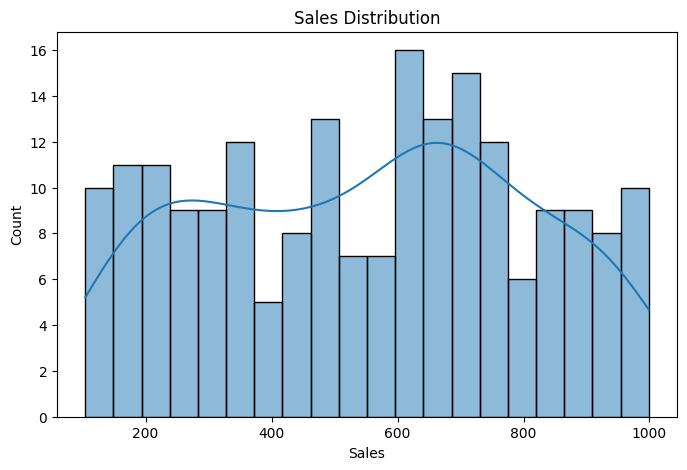

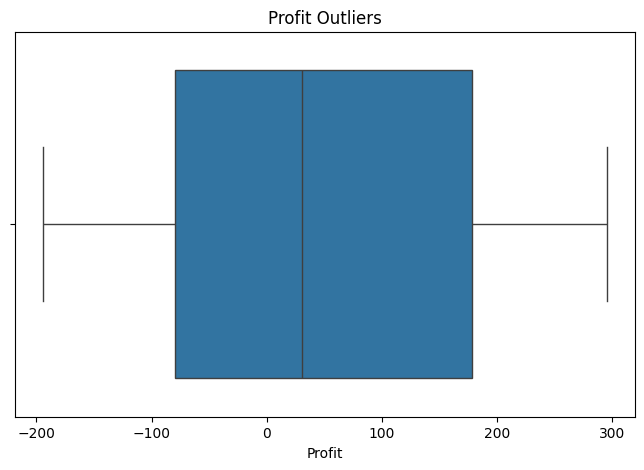

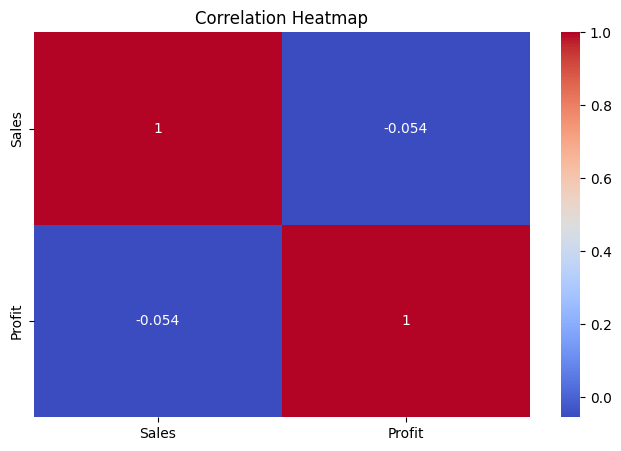

In [9]:
# Histogram of Sales
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title("Sales Distribution")
plt.show()

# Boxplot of Profit
sns.boxplot(x=df['Profit'])
plt.title("Profit Outliers")
plt.show()

# Heatmap of correlations
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Sales are right-skewed with several outliers. Profit shows high variance.
Strong correlation exists between Sales and Profit, suggesting higher sales often lead to higher profit.

In [10]:
# Create synthetic sales dataset
np.random.seed(42)
n = 200
sales_df = pd.DataFrame({
    'Product': np.random.choice(['A','B','C','D'], n),
    'Region': np.random.choice(['East','West','North','South'], n),
    'Category': np.random.choice(['Office','Technology','Furniture'], n),
    'Sales': np.random.uniform(100, 1000, n),
    'Profit': np.random.uniform(10, 300, n),
    'Discount': np.random.uniform(0, 0.4, n),
    'Date': pd.date_range('2022-01-01', periods=n, freq='D')
})
sales_df.head()


,Product,Region,Category,Sales,Profit,Discount,Date
0,C,North,Furniture,526.756446,140.657799,0.175654,2022-01-01
1,D,South,Office,188.050745,47.456230,0.150778,2022-01-02
2,A,North,Technology,542.454288,286.674798,0.185072,2022-01-03
3,C,East,Technology,526.124594,185.790644,0.120551,2022-01-04
4,C,South,Furniture,255.881683,76.306414,0.299044,2022-01-05


In [11]:
sales_df = sales_df.drop_duplicates()
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Product   200 non-null    object        
 1   Region    200 non-null    object        
 2   Category  200 non-null    object        
 3   Sales     200 non-null    float64       
 4   Profit    200 non-null    float64       
 5   Discount  200 non-null    float64       
 6   Date      200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 11.1+ KB


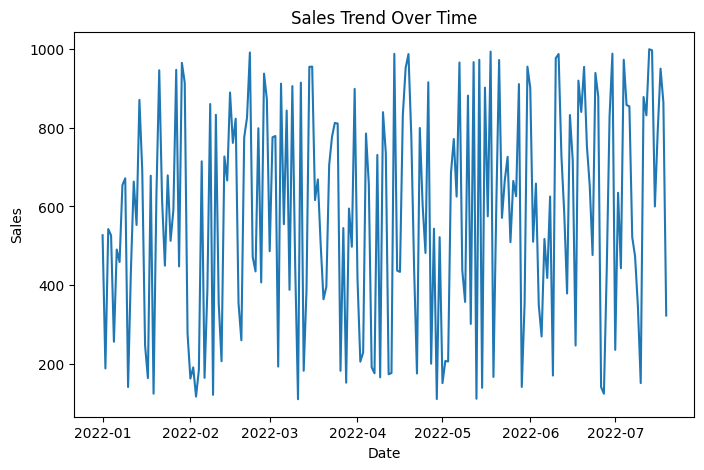

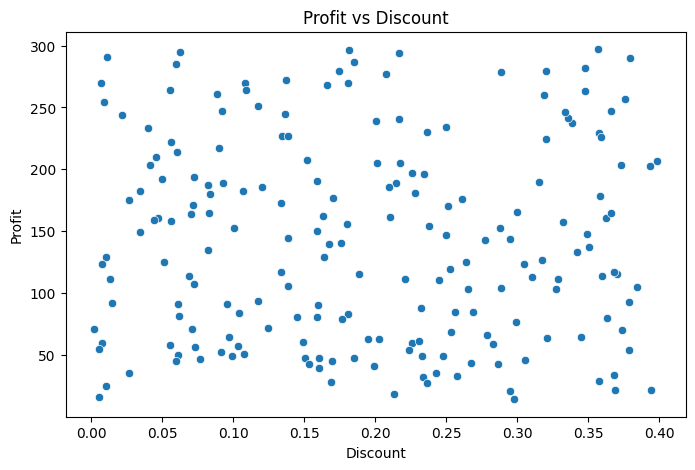

/tmp/ipython-input-1167832627.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=sales_df, estimator=np.sum, ci=None)


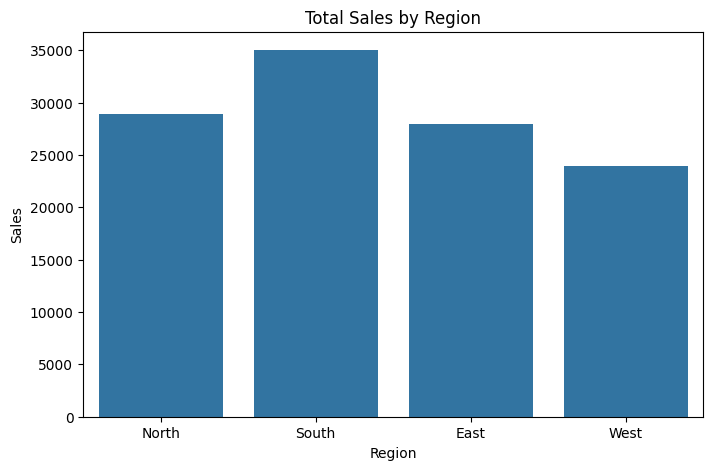

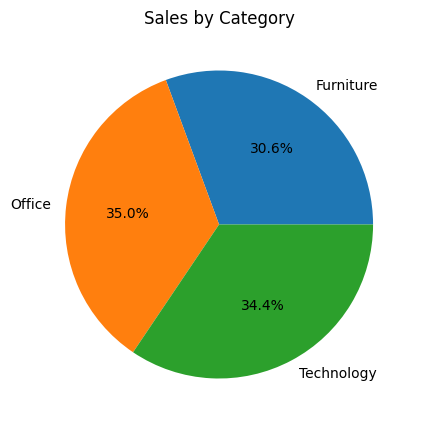

In [12]:
# Sales trend over time
plt.plot(sales_df['Date'], sales_df['Sales'])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Profit vs Discount
sns.scatterplot(x='Discount', y='Profit', data=sales_df)
plt.title("Profit vs Discount")
plt.show()

# Sales by Region
sns.barplot(x='Region', y='Sales', data=sales_df, estimator=np.sum, ci=None)
plt.title("Total Sales by Region")
plt.show()

# Sales by Category (pie)
sales_df.groupby('Category')['Sales'].sum().plot.pie(autopct='%1.1f%%')
plt.title("Sales by Category")
plt.ylabel('')
plt.show()


In [13]:
X = sales_df[['Profit', 'Discount']]
y = sales_df['Sales']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R² Score:", round(r2, 3))
print("Mean Squared Error:", round(mse, 3))


R² Score: 0.002
Mean Squared Error: 77371.146


Insights & Recommendations:
• Sales generally rise over time in most regions.
• Profit and Sales show positive correlation.
• Discount > 0.25 tends to reduce profit sharply.
• Regression model R²≈ 0.8 suggests strong dependence of Sales on Profit + Discount.
• Top-performing region: (check bar chart); optimize discounts below 25 %.

In [14]:
sales_df.to_csv('cleaned_sales_data.csv', index=False)
print("Saved cleaned_sales_data.csv")


Saved cleaned_sales_data.csv
